# Miniproject Joshua Kutschera (heart attack dataset)
This project is based on the [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data) from Kaggle.com.

[Idea for chart](https://github.com/holoviz/holoviews/issues/3821)

## About this dataset:

    Age : Age of the patient, 

    Sex : Sex of the patient, 1=male, 0=female
    
    cp : Chest Pain type chest pain type
            Value 1: typical angina
            Value 2: atypical angina
            Value 3: non-anginal pain
            Value 4: asymptomatic
            
    trtbps : resting blood pressure (in mm Hg)

    chol : cholestoral in mg/dl fetched via BMI sensor

    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    
    rest_ecg : resting electrocardiographic results
            Value 0: normal
            Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
            Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
            
    thalach : maximum heart rate achieved

    exng: exercise induced angina (1 = yes; 0 = no)

    oldpeak: ST depression induced by exercise relative to rest (float)

    slp: Slope of the peak exercise ST segment 
        1= upsloping
        2= flat
        3= downsloping
        
    caa: number of major vessels (0-3)

    thall: thal: A blood disorder called thalassemia
        Value 0: NULL (dropped from the dataset previously

        Value 1: fixed defect (no blood flow in some part of the heart)
        
        Value 2: normal blood flow
        
        Value 3: reversible defect (a blood flow is observed but it is not normal)
    
    output (target): 0= less chance of heart attack 1= more chance of heart attack
    
## Dataset Overview
- `age`, `sex`, `cp`, `trtbps`, `chol`, etc., are the features.
- `output` (1 or 0) is the target variable (1 = risk of heart attack).

## Questions
Who is at risk of having a heart attack?
What is the biggest factor playing into being at risk?


 -   Find your favourite dataset
 -   Describe origin and specification of these data
 -   Find 2 research questions (prediction context)
 -   Plot variables of interest (both 1- and 2-variable plots)
 -   Interpret plots
 -   Fit tree, random forest to answer questions
 -   Describe performance (validation, train/test, cross validation)
 -   Compare with linear model (or logistic linear model)

In [63]:
# Step 1: Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_squared_error, f1_score, recall_score
)

from math import sqrt

In [64]:
# Step 2: Load and Describe Dataset
heart_data = pd.read_csv("Data/heart.csv")

print("First 5 rows of the dataset:")
print(heart_data.head())

print("\nDataset Info:")
print(heart_data.info())

print("\nDataset Description:")
print(heart_data.describe())

# Check for missing values
print("Missing values in each column:")
print(heart_data.isnull().sum())

First 5 rows of the dataset:
   age  sex  cp  trtbps  chol  fbs  restecg  thalach  exng  oldpeak  slp  caa  \
0   63    1   3     145   233    1        0      150     0      2.3    0    0   
1   37    1   2     130   250    0        1      187     0      3.5    0    0   
2   41    0   1     130   204    0        0      172     0      1.4    2    0   
3   56    1   1     120   236    0        1      178     0      0.8    2    0   
4   57    0   0     120   354    0        1      163     1      0.6    2    0   

   thall  output  
0      1       1  
1      2       1  
2      2       1  
3      2       1  
4      2       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   trtbps   303 non-null    int64  
 4   chol     303 non-

In [65]:
# Step 3: Define Research Questions
# 1. What are the key features that influence heart attack prediction the most?
# 2. How well do machine learning models perform in predicting heart attack risks based on key features?

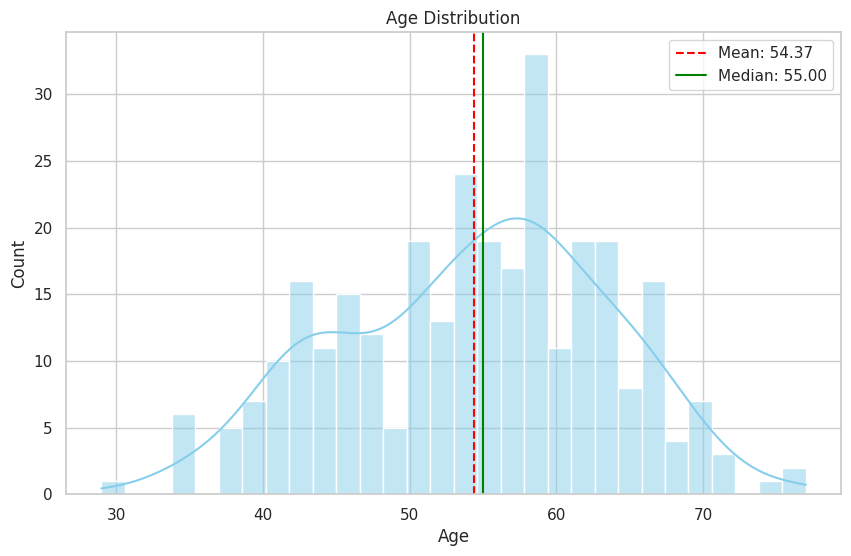

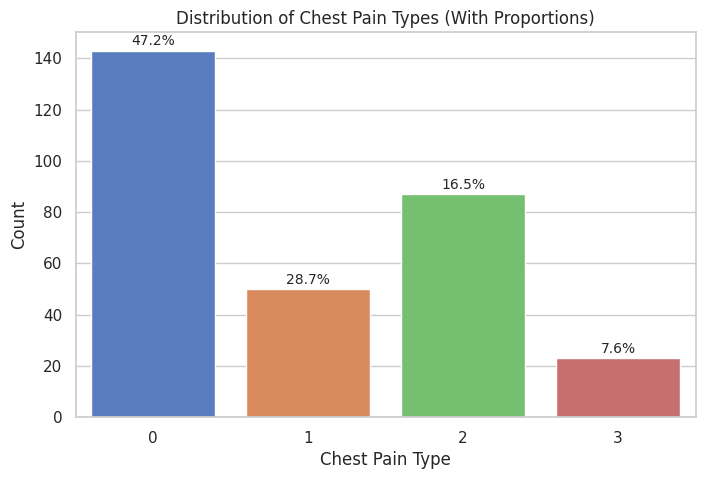

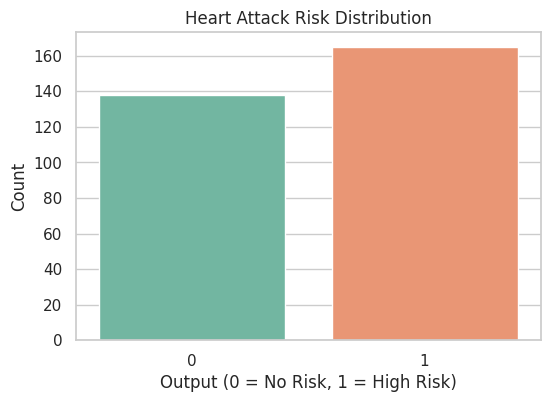

In [66]:
# Step 4: Exploratory Data Analysis (EDA)
## 4.1 Univariate Analysis (Single-variable plots)
# Age Distribution with Mean and Median
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
mean_age = heart_data['age'].mean()
median_age = heart_data['age'].median()
sns.histplot(heart_data['age'], bins=30, kde=True, color='skyblue')
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', label=f'Median: {median_age:.2f}')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

# Maximum Heart Rate Achieved
# plt.figure(figsize=(10, 6))
# mean_thalach = heart_data['thalach'].mean()
# sns.histplot(heart_data['thalach'], bins=30, kde=True, color='lightcoral')
# plt.axvline(mean_thalach, color='blue', linestyle='--', label=f'Mean: {mean_thalach:.2f}')
# plt.title("Maximum Heart Rate Achieved")
# plt.xlabel("Maximum Heart Rate")
# plt.ylabel("Count")
# plt.legend()
# plt.show()

# Chest Pain Type Distribution with Proportions
plt.figure(figsize=(8, 5))
cp_counts = heart_data['cp'].value_counts(normalize=True) * 100
sns.countplot(x='cp', data=heart_data, hue='cp', palette='muted', legend=False)  # Fix here
for i, value in enumerate(cp_counts):
    plt.text(i, cp_counts[i] / 100 * len(heart_data) + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
plt.title("Distribution of Chest Pain Types (With Proportions)")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

# Target Variable Distribution (Heart Attack Risk)
plt.figure(figsize=(6, 4))
sns.countplot(x='output', data=heart_data, hue='output', palette='Set2', legend=False)  # Fix here
plt.title("Heart Attack Risk Distribution")
plt.xlabel("Output (0 = No Risk, 1 = High Risk)")
plt.ylabel("Count")
plt.show()

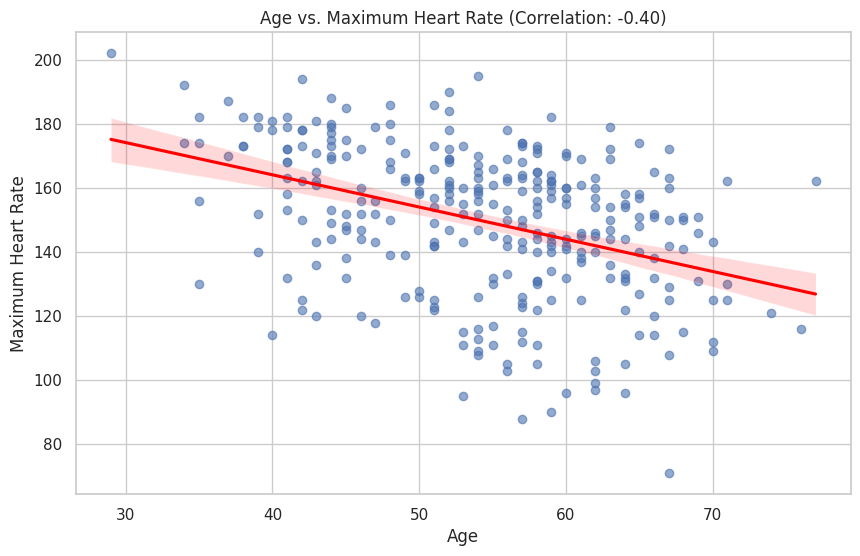

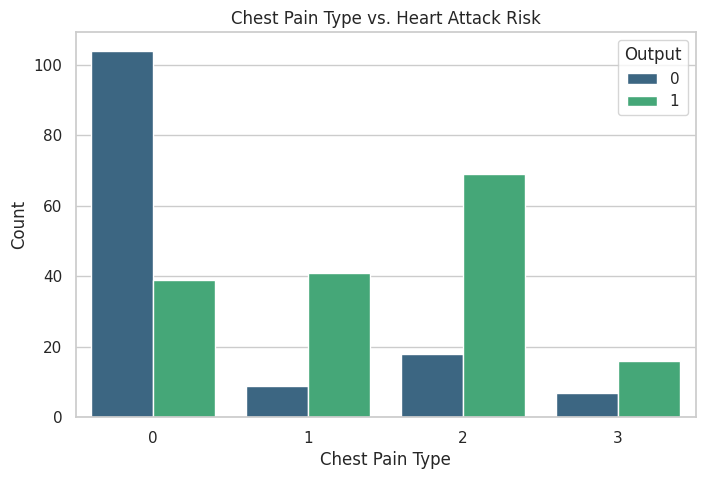

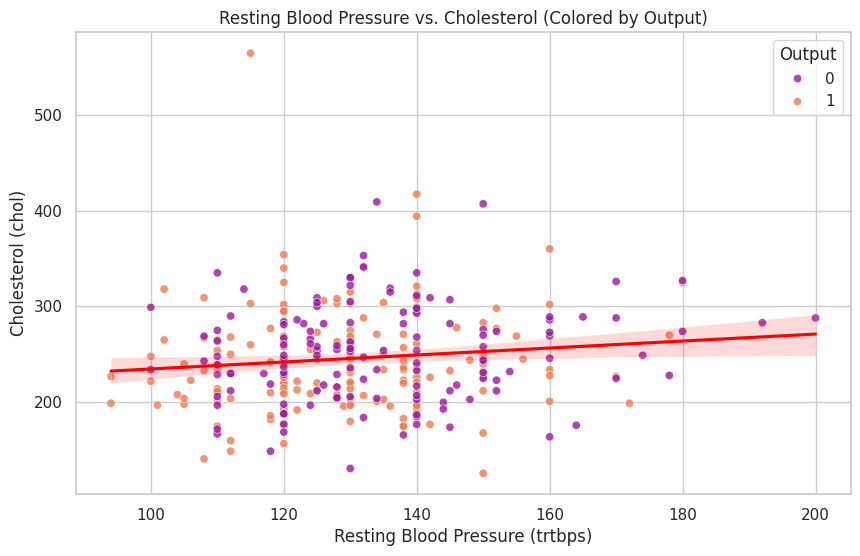

In [67]:
## 4.2 Bivariate Analysis (Two-variable plots)
# Age vs. Maximum Heart Rate with Regression Line and Correlation Coefficient
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='thalach', data=heart_data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
correlation = heart_data['age'].corr(heart_data['thalach'])
plt.title(f"Age vs. Maximum Heart Rate (Correlation: {correlation:.2f})")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# Chest Pain Type vs. Heart Attack Risk
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='output', data=heart_data, palette='viridis')
plt.title("Chest Pain Type vs. Heart Attack Risk")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Output")
plt.show()

# Resting Blood Pressure vs. Cholesterol (Colored by Output)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trtbps', y='chol', hue='output', data=heart_data, palette='plasma', alpha=0.8)
sns.regplot(x='trtbps', y='chol', data=heart_data, scatter=False, line_kws={'color': 'red'})
plt.title("Resting Blood Pressure vs. Cholesterol (Colored by Output)")
plt.xlabel("Resting Blood Pressure (trtbps)")
plt.ylabel("Cholesterol (chol)")
plt.legend(title="Output")
plt.show()

# Slope of Peak ST Segment vs. Heart Attack Risk
# plt.figure(figsize=(8, 5))
# sns.countplot(x='slp', hue='output', data=heart_data, palette='cubehelix')
# plt.title("Slope of Peak ST Segment vs. Heart Attack Risk")
# plt.xlabel("Slope of Peak ST Segment")
# plt.ylabel("Count")
# plt.legend(title="Output")
# plt.show()

In [82]:
# Step 5: Data Preparation
# Separate features (X) and target (y)
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows - {X_train.shape[0]/heart_data.__len__()*100}%")
print(f"Test set size: {X_test.shape[0]} rows - {X_test.shape[0]/heart_data.__len__()*100}%")

Training set size: 242 rows - 79.86798679867987%
Test set size: 61 rows - 20.13201320132013%


In [83]:
# Step 6: Train Models
# 6.1 Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# 6.2 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 6.3 Logistic Regression
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [84]:
# Step 7: Model Performance Evaluation
def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
evaluate_model("Decision Tree", y_test, dt_preds)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
evaluate_model("Random Forest", y_test, rf_preds)

# Logistic Regression
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
evaluate_model("Logistic Regression", y_test, lr_preds)


Decision Tree Performance:
Accuracy: 0.7540983606557377
F1 Score: 0.7368421052631579
Recall: 0.65625
MSE: 0.2459016393442623
RMSE: 0.4958847036804647
Confusion Matrix:
 [[25  4]
 [11 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61


Random Forest Performance:
Accuracy: 0.8360655737704918
F1 Score: 0.84375
Recall: 0.84375
MSE: 0.16393442622950818
RMSE: 0.40488816508945796
Confusion Matrix:
 [[24  5]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84     

In [85]:
# Step 8: Cross-validation
def cross_validate_model(model, X, y, model_name):
    """Perform cross-validation and print results."""
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"\n{model_name} Cross-Validation Results:")
    print("Accuracy scores:", scores)
    print("Mean Accuracy:", np.mean(scores))

cross_validate_model(dt_model, X, y, "Decision Tree")
cross_validate_model(rf_model, X, y, "Random Forest")
cross_validate_model(lr_model, X, y, "Logistic Regression")


Decision Tree Cross-Validation Results:
Accuracy scores: [0.75409836 0.85245902 0.75409836 0.7        0.71666667]
Mean Accuracy: 0.755464480874317

Random Forest Cross-Validation Results:
Accuracy scores: [0.81967213 0.8852459  0.83606557 0.85       0.8       ]
Mean Accuracy: 0.8381967213114756

Logistic Regression Cross-Validation Results:
Accuracy scores: [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean Accuracy: 0.8282513661202187


/tmp/ipykernel_28451/3185993221.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='Set2')


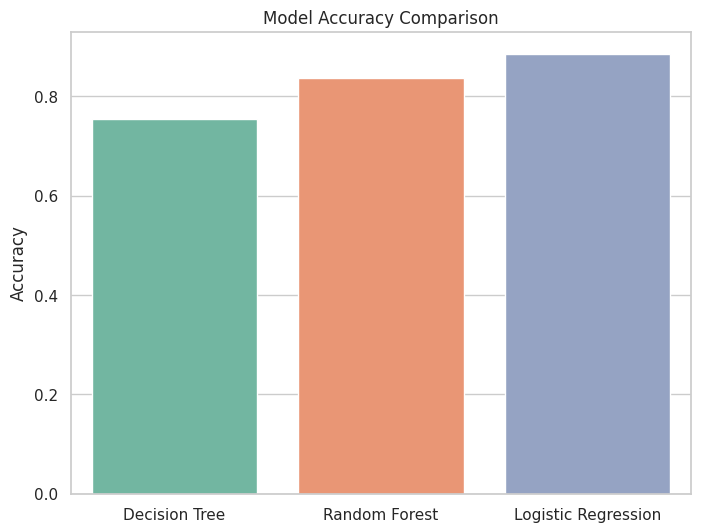

In [86]:
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
accuracy = [accuracy_score(y_test, dt_preds), accuracy_score(y_test, rf_preds), accuracy_score(y_test, lr_preds)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy, palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

/tmp/ipykernel_28451/639505559.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


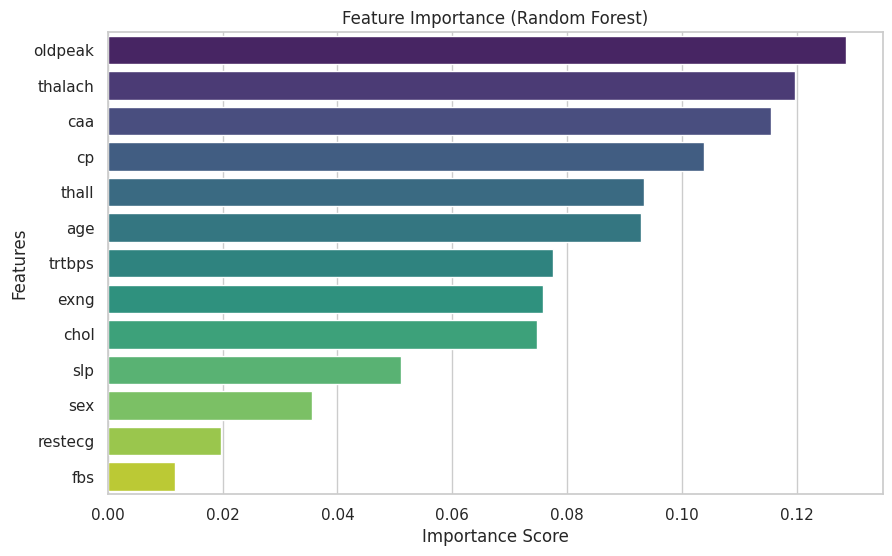

In [87]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


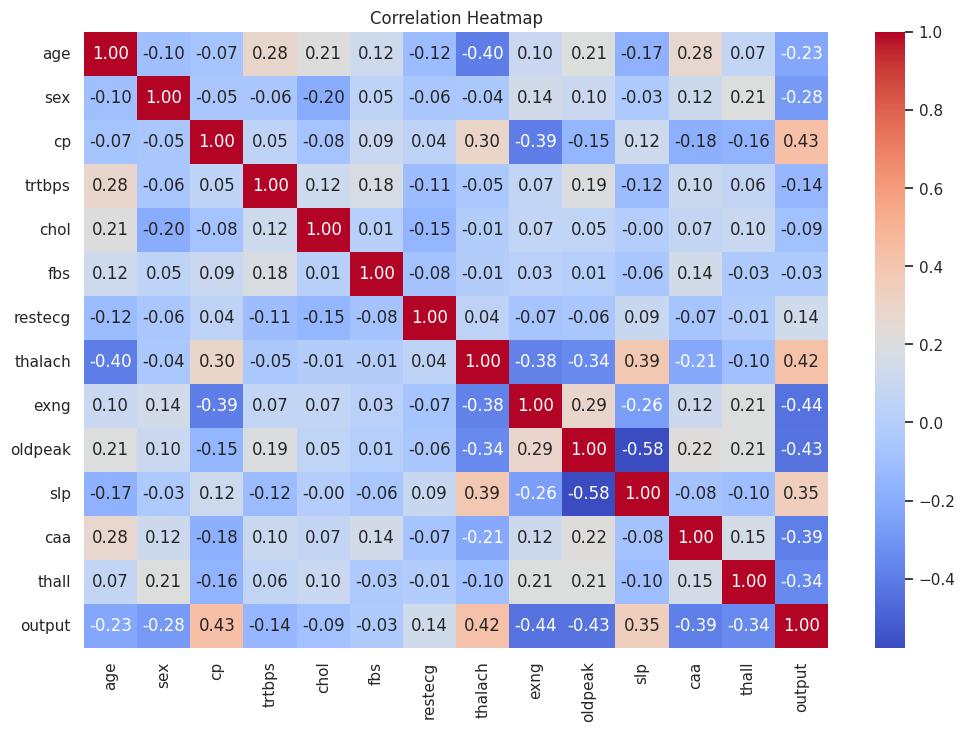

In [88]:
plt.figure(figsize=(12, 8))
corr_matrix = heart_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

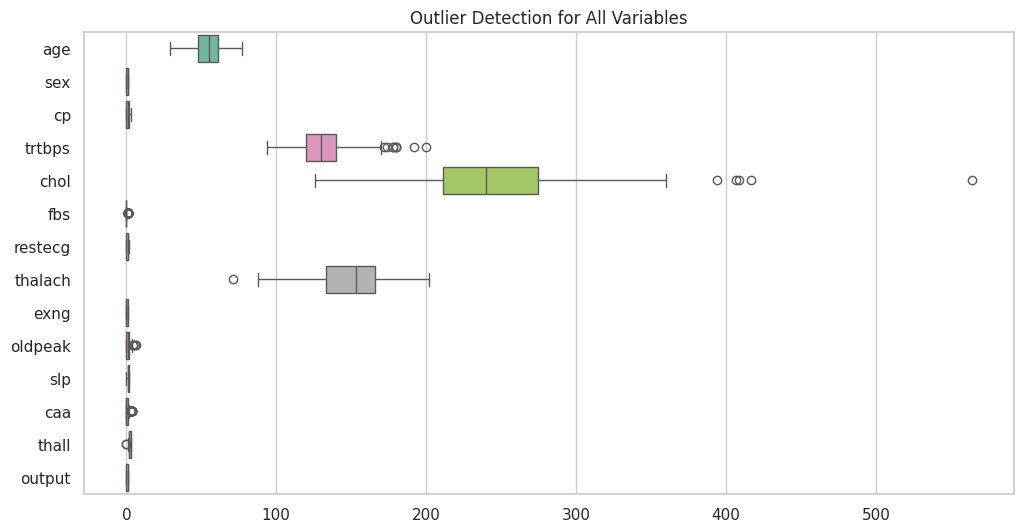

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=heart_data, orient='h', palette='Set2')
plt.title('Outlier Detection for All Variables')
plt.show()